In [1]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 13.5 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=ae598ce43179a1f49d1f6bdcbe88e7c0ecab9a8f9bcdd2af2668fe29d313287a
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [2]:
import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

import lime
import os
import sys
from lime import lime_image
from skimage.segmentation import mark_boundaries

import matplotlib.pyplot as plt

print('Notebook running: keras ', keras.__version__)
np.random.seed(222)
# inet_model = inc_net.InceptionV3()

Notebook running: keras  2.9.0


In [3]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.9.0


In [ ]:
# inet_model = inc_net.InceptionV3()

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from google.colab import drive
import glob

from tensorflow.keras.models import Model

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
model_load= tf.keras.models.load_model('/content/drive/MyDrive/mri_project/weights-improvement-67-0.9373.hdf5')

# inet_model_1 = inc_net.model_load

ValueError: ignored

In [11]:
!pip install tensorflow-addons==0.8.3
# !pip install tensorflow==2.2.0-rc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 13.6 MB/s 


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB2,EfficientNetB3,EfficientNetB5,InceptionResNetV2#,EfficientNetV2S
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix
import tensorflow_addons as tfa
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from typing import List
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from functools import partial
import posixpath
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from tensorflow.keras.models import Model

In [14]:
from keras.models import load_model
# model = load_model('model.h5')

In [15]:
from keras.models import load_model
model_load= load_model('/content/drive/My Drive/mri_project/weights-improvement-67-0.9373.hdf5')

In [16]:
from tensorflow.keras.utils import load_img, img_to_array
from keras_preprocessing.image import load_img

In [ ]:
# inet_model = inc_net.model_load()

In [10]:
from keras.applications.resnet import preprocess_input

In [ ]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = keras.utils.load_img(img_path, target_size=(299, 299))
        x = keras.utils.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        # x = model_load.preprocess_input(x)
        x = preprocess_input(x)
        out.append(x)
    return np.vstack(out)

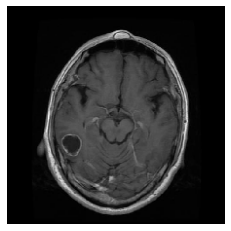

In [ ]:
# load an image
# Xi = skimage.io.imread("/content/drive/My Drive/Dataset/Train/HEALTHY/IM-0030-0001.jpeg")
Xi = "/content/drive/MyDrive/mri_project/Training/glioma_tumor/gg (12).jpg"
# /content/drive/MyDrive/mri_project/Training/glioma_tumor/gg (1).jpg
img = keras.utils.load_img(Xi, target_size=(224, 224))
img_orig = keras.utils.img_to_array(img)
plt.imshow(img);
plt.axis('off');

In [ ]:
def new_predict_fn(Xi):
   Xi = skimage_to_vgg(Xi)
   return predict_fn(Xi)

TypeError: ignored

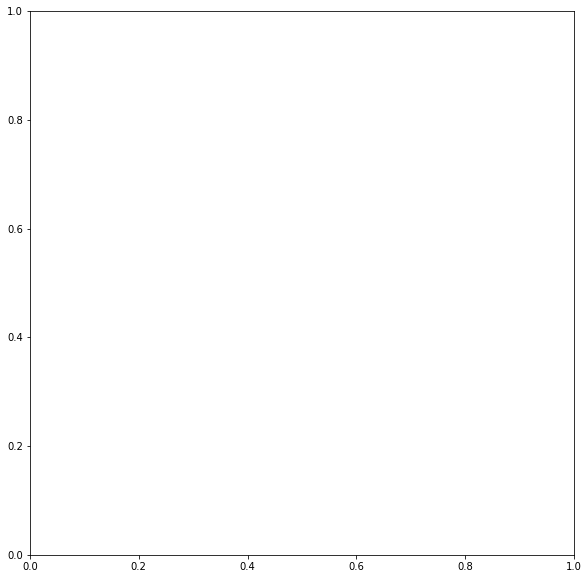

In [ ]:
# Checking augmentation

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        # aug_img= augmentation_layer(images)
        # ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images.numpy().astype('int32'))
        plt.axis("off")

In [ ]:
images = transform_img_fn([os.path.join('/content/drive/MyDrive/mri_project/Training/glioma_tumor/gg (12).jpg')])
images = images.take(1)
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
# images = cv2.resize(images, (224, 224))
# images = images.reshape(1, 224, 224, 3)
print(images.shape)
plt.imshow(images[0] / 2 + 0.5)
preds = model_load.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

()


IndexError: ignored

In [ ]:
top_pred_classes = preds[0].argsort()[-3:][::-1]
top_pred_classes   #Index of top 5 classes

array([787, 427, 618])

In [ ]:

%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 83ms/step
CPU times: user 18.3 s, sys: 529 ms, total: 18.8 s
Wall time: 21.4 s


In [ ]:
from skimage.segmentation import mark_boundaries

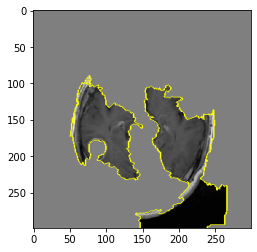

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

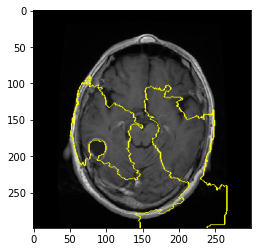

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

##Try2

In [17]:
from keras.models import load_model
model_load= load_model('/content/drive/MyDrive/mri_project/weights-improvement-67-0.9373.hdf5')

In [18]:
model_load.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 efficientnetb5 (Functional)    (None, None, None,   28513527    ['input_10[0][0]']               
                                2048)                                                             
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 7, 7, 2048)  8192        ['efficientnetb5[0][0]']         
 rmalization)                                                                               

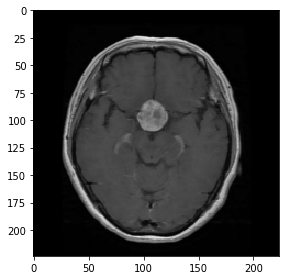

In [339]:
Xi = skimage.io.imread("/content/drive/MyDrive/mri_project/Training/pituitary_tumor/p (22).jpg")#https://arteagac.github.io/blog/lime_image/img/cat-and-dog.jpg #/content/drive/My Drive/Dataset/Train/COVID_19/1F6343EE-AFEC-4B7D-97F5-62797EE18767.jpeg
Xi = skimage.transform.resize(Xi, (224,224)) 
Xi = (Xi - 0.5)*2 #Inception pre-processing
skimage.io.imshow(Xi/2+0.5) # Show image before inception preprocessing 1_1.jpeg

In [340]:
print(Xi.shape)

(224, 224, 3)


In [341]:
np.random.seed(222)

preds = model_load.predict(Xi[np.newaxis])
print(preds.shape)
print(preds)
# decode_predictions(preds)[0] #Top 5 classes

1/1 [==============================] - 0s 38ms/step
(1, 4)
[[0.00816597 0.00387403 0.98561424 0.00234582]]


In [342]:
top_pred_classes = preds[0].argsort()[-2:][::-1]
top_pred_classes                #Index of top 5 classes

array([2, 0])

In [343]:
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=5,max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

15

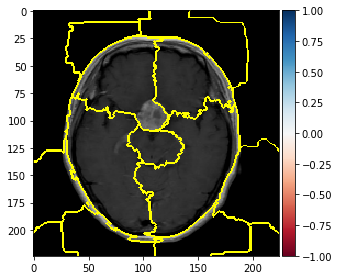

In [344]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi/2.1+0.4, superpixels))

In [345]:
num_perturb = 2400
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations[0] #Show example of perturbation

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [376]:
def perturb_image(img,perturbation,segments):
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

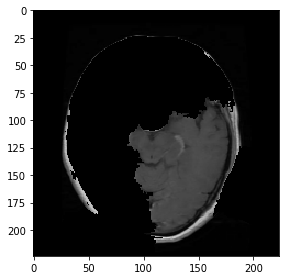

In [385]:
skimage.io.imshow(perturb_image(Xi/2+0.5,perturbations[0],superpixels))

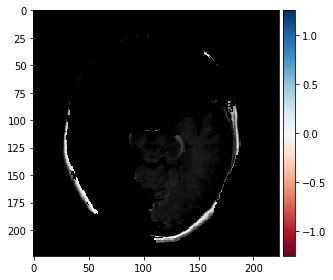

In [384]:
skimage.io.imshow(perturb_image(Xi/1+0.5,perturbations[0],superpixels))

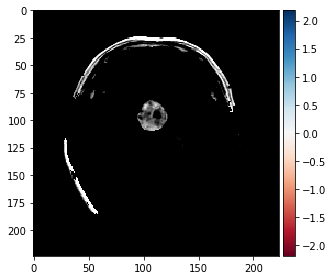

In [383]:
skimage.io.imshow(perturb_image(Xi/.5+0.5,perturbations[3],superpixels))

In [350]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(Xi,pert,superpixels)
  pred = model_load.predict(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)
predictions.shape

1/1 [==============================] - 0s 38ms/step


(2400, 1, 4)

In [351]:
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
distances.shape

(2400,)

In [352]:
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
weights.shape

(2400,)

In [353]:
class_to_explain = top_pred_classes[0]
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]
coeff

array([ 0.00563997,  0.00791565,  0.01336745,  0.01285638, -0.00375942,
       -0.00106595,  0.00179405,  0.00080014,  0.01018421,  0.00747288,
       -0.00095681, -0.00149672,  0.00035676,  0.00905551,  0.00153105])

In [354]:
num_top_features = 4
top_features = np.argsort(coeff)[-num_top_features:] 
top_features

array([13,  8,  3,  2])

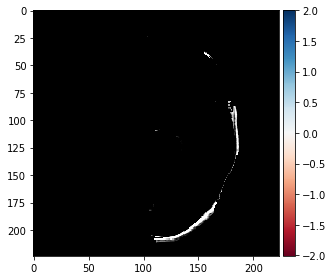

In [355]:
mask = np.zeros(num_superpixels) 
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(Xi/.5+.5,mask,superpixels) )

In [356]:
# !pip install lime

In [357]:
import lime
import os
import sys
from lime import lime_image

In [358]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(Xi, model_load.predict, top_labels=5, hide_color=0, num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


In [359]:
import matplotlib.pyplot as plt

In [360]:
from skimage.segmentation import mark_boundaries

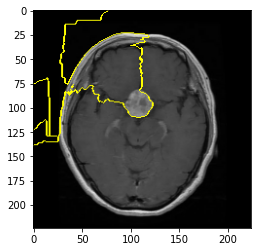

In [367]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[2], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [362]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [386]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[2], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Meningoma

In [20]:
from keras.models import load_model
model_load= load_model('/content/drive/MyDrive/mri_project/weights-improvement-67-0.9373.hdf5')

In [ ]:
model_load.summary()

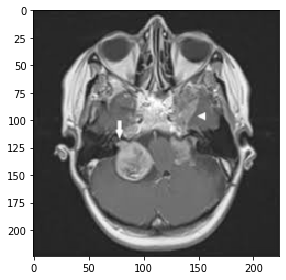

In [140]:
Xi = skimage.io.imread("/content/drive/MyDrive/mri_project/Training/meningioma_tumor/m1(10).jpg")#https://arteagac.github.io/blog/lime_image/img/cat-and-dog.jpg #/content/drive/My Drive/Dataset/Train/COVID_19/1F6343EE-AFEC-4B7D-97F5-62797EE18767.jpeg
Xi = skimage.transform.resize(Xi, (224,224)) 
Xi = (Xi - 0.5)*2 #Inception pre-processing
skimage.io.imshow(Xi/2+0.5) # Show image before inception preprocessing 1_1.jpeg

In [141]:
print(Xi.shape)

(224, 224, 3)


In [142]:
np.random.seed(222)

preds = model_load.predict(Xi[np.newaxis])
print(preds.shape)
print(preds)
# decode_predictions(preds)[0] #Top 5 classes

1/1 [==============================] - 0s 60ms/step
(1, 4)
[[1.4091612e-02 1.6148409e-04 9.8550713e-01 2.3979164e-04]]


In [143]:
top_pred_classes = preds[0].argsort()[-2:][::-1]
top_pred_classes                #Index of top 5 classes

array([2, 0])

In [144]:
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=5,max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

22

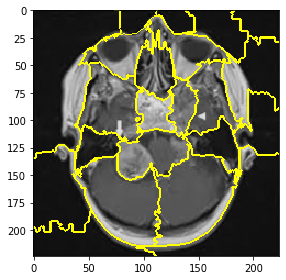

In [145]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi/2.1+0.4, superpixels))

In [146]:
num_perturb = 2400
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations[0] #Show example of perturbation

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [147]:
def perturb_image(img,perturbation,segments):
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

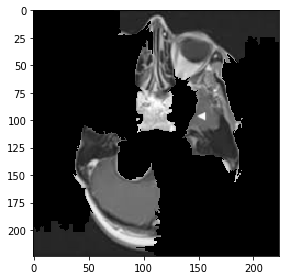

In [148]:
skimage.io.imshow(perturb_image(Xi/2+0.5,perturbations[0],superpixels))

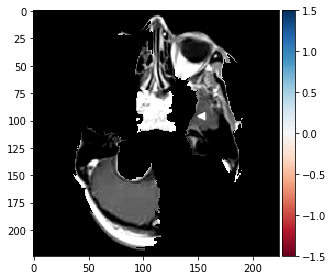

In [149]:
skimage.io.imshow(perturb_image(Xi/1+0.5,perturbations[0],superpixels))

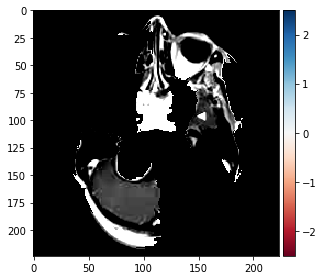

In [150]:
skimage.io.imshow(perturb_image(Xi/.5+0.5,perturbations[0],superpixels))

In [151]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(Xi,pert,superpixels)
  pred = model_load.predict(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)
predictions.shape

1/1 [==============================] - 0s 42ms/step


(2400, 1, 4)

In [152]:
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
distances.shape

(2400,)

In [153]:
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
weights.shape

(2400,)

In [154]:
class_to_explain = top_pred_classes[0]
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]
coeff

array([-6.85980238e-04,  9.82432269e-04,  1.10541812e-03,  5.20611601e-04,
        2.84918676e-02,  3.28095770e-04,  3.21131165e-04,  6.22505588e-04,
       -3.65558544e-05,  4.37355421e-04, -7.72990143e-05, -1.44842853e-03,
        1.25994673e-03,  2.82719484e-04,  5.96730931e-04,  5.31349388e-03,
       -2.07190948e-03, -5.86271477e-03, -2.05521432e-02,  3.44444907e-02,
        1.21205036e-03, -6.23991006e-04])

In [155]:
num_top_features = 4
top_features = np.argsort(coeff)[-num_top_features:] 
top_features

array([12, 15,  4, 19])

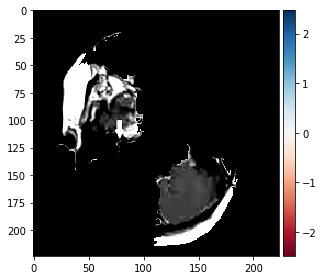

In [156]:

mask = np.zeros(num_superpixels) 
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(Xi/0.5+.5,mask,superpixels) )

In [157]:
# !pip install lime

In [158]:
import lime
import os
import sys
from lime import lime_image

In [159]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(Xi, model_load.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 47ms/step


In [160]:
import matplotlib.pyplot as plt

In [161]:
from skimage.segmentation import mark_boundaries

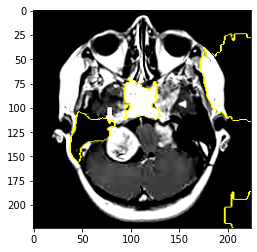

In [162]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[3], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 0.5 + 0.5, mask))

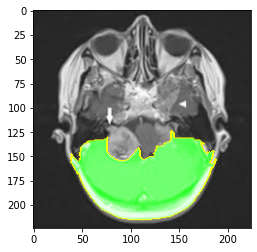

In [166]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=2, hide_rest=False)
plt.imshow(mark_boundaries(temp /2 + 0.5, mask))

##Occlusion

In [ ]:
model_load

In [ ]:
!pip install tf-explain==-0.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tf-explain==-0.2.1 (from versions: 0.0.1a0, 0.0.2a0, 0.1.0, 0.2.0, 0.2.1, 0.3.0, 0.3.1)
ERROR: No matching distribution found for tf-explain==-0.2.1


In [ ]:
pip install tensorflow==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 319, in run
    reqs, check_supported_wheels=not options.target_dir
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 128, in resolve
    requirements, max_rounds=try_to_avoid_resolution_too_deep
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 473, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/resolvelib/resolv

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
import requests
# from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity
# from tf_explain.core.grad_cam import GradCAM
# from tf_explain.core.smoothgrad import SmoothGrad


##Grad CAM


In [ ]:
import argparse
import cv2
import numpy as np
import torch
from torch.autograd import Function
from torchvision import models

class FeatureExtractor():
    """ Class for extracting activations and 
    registering gradients from targetted intermediate layers """

    def __init__(self, model, target_layers):
        self.model = model
        self.target_layers = target_layers
        self.gradients = []

    def save_gradient(self, grad):
        self.gradients.append(grad)

    def __call__(self, x):
        outputs = []
        self.gradients = []
        for name, module in self.model._modules.items():
            x = module(x)
            if name in self.target_layers:
                x.register_hook(self.save_gradient)
                outputs += [x]
        return outputs, x


class ModelOutputs():
    """ Class for making a forward pass, and getting:
    1. The network output.
    2. Activations from intermeddiate targetted layers.
    3. Gradients from intermeddiate targetted layers. """

    def __init__(self, model, feature_module, target_layers):
        self.model = model
        self.feature_module = feature_module
        self.feature_extractor = FeatureExtractor(self.feature_module, target_layers)

    def get_gradients(self):
        return self.feature_extractor.gradients

    def __call__(self, x):
        target_activations = []
        for name, module in self.model._modules.items():
            if module == self.feature_module:
                target_activations, x = self.feature_extractor(x)
            elif "avgpool" in name.lower():
                x = module(x)
                x = x.view(x.size(0),-1)
            else:
                x = module(x)
        
        return target_activations, x


def preprocess_image(img):
    means = [0.485, 0.456, 0.406]
    stds = [0.229, 0.224, 0.225]

    preprocessed_img = img.copy()[:, :, ::-1]
    for i in range(3):
        preprocessed_img[:, :, i] = preprocessed_img[:, :, i] - means[i]
        preprocessed_img[:, :, i] = preprocessed_img[:, :, i] / stds[i]
    preprocessed_img = \
        np.ascontiguousarray(np.transpose(preprocessed_img, (2, 0, 1)))
    preprocessed_img = torch.from_numpy(preprocessed_img)
    preprocessed_img.unsqueeze_(0)
    input = preprocessed_img.requires_grad_(True)
    return input


def show_cam_on_image(img, mask):
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    cv2.imwrite("cam.jpg", np.uint8(255 * cam))


class GradCam:
    def __init__(self, model, feature_module, target_layer_names, use_cuda):
        self.model = model
        self.feature_module = feature_module
        self.model.eval()
        self.cuda = use_cuda
        if self.cuda:
            self.model = model.cuda()

        self.extractor = ModelOutputs(self.model, self.feature_module, target_layer_names)

    def forward(self, input):
        return self.model(input)

    def __call__(self, input, index=None):
        if self.cuda:
            features, output = self.extractor(input.cuda())
        else:
            features, output = self.extractor(input)

        if index == None:
            index = np.argmax(output.cpu().data.numpy())

        one_hot = np.zeros((1, output.size()[-1]), dtype=np.float32)
        one_hot[0][index] = 1
        one_hot = torch.from_numpy(one_hot).requires_grad_(True)
        if self.cuda:
            one_hot = torch.sum(one_hot.cuda() * output)
        else:
            one_hot = torch.sum(one_hot * output)

        self.feature_module.zero_grad()
        self.model.zero_grad()
        one_hot.backward(retain_graph=True)

        grads_val = self.extractor.get_gradients()[-1].cpu().data.numpy()

        target = features[-1]
        target = target.cpu().data.numpy()[0, :]

        weights = np.mean(grads_val, axis=(2, 3))[0, :]
        cam = np.zeros(target.shape[1:], dtype=np.float32)

        for i, w in enumerate(weights):
            cam += w * target[i, :, :]

        cam = np.maximum(cam, 0)
        cam = cv2.resize(cam, input.shape[2:])
        cam = cam - np.min(cam)
        cam = cam / np.max(cam)
        return cam


class GuidedBackpropReLU(Function):

    @staticmethod
    def forward(self, input):
        positive_mask = (input > 0).type_as(input)
        output = torch.addcmul(torch.zeros(input.size()).type_as(input), input, positive_mask)
        self.save_for_backward(input, output)
        return output

    @staticmethod
    def backward(self, grad_output):
        input, output = self.saved_tensors
        grad_input = None

        positive_mask_1 = (input > 0).type_as(grad_output)
        positive_mask_2 = (grad_output > 0).type_as(grad_output)
        grad_input = torch.addcmul(torch.zeros(input.size()).type_as(input),
                                   torch.addcmul(torch.zeros(input.size()).type_as(input), grad_output,
                                                 positive_mask_1), positive_mask_2)

        return grad_input


class GuidedBackpropReLUModel:
    def __init__(self, model, use_cuda=True):
        self.model = model
        self.model.eval()
        self.cuda = use_cuda
        if self.cuda:
            self.model = model.cuda()

        def recursive_relu_apply(module_top):
            for idx, module in module_top._modules.items():
                recursive_relu_apply(module)
                if module.__class__.__name__ == 'ReLU':
                    module_top._modules[idx] = GuidedBackpropReLU.apply
                
        # replace ReLU with GuidedBackpropReLU
        recursive_relu_apply(self.model)

    def forward(self, input):
        return self.model(input)

    def __call__(self, input, index=None):
        if self.cuda:
            output = self.forward(input.cuda())
        else:
            output = self.forward(input)

        if index == None:
            index = np.argmax(output.cpu().data.numpy())

        one_hot = np.zeros((1, output.size()[-1]), dtype=np.float32)
        one_hot[0][index] = 1
        one_hot = torch.from_numpy(one_hot).requires_grad_(True)
        if self.cuda:
            one_hot = torch.sum(one_hot.cuda() * output)
        else:
            one_hot = torch.sum(one_hot * output)

        # self.model.features.zero_grad()
        # self.model.classifier.zero_grad()
        one_hot.backward(retain_graph=True)

        output = input.grad.cpu().data.numpy()
        output = output[0, :, :, :]

        return output


def get_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--use-cuda', action='store_true', default=False,
                        help='Use NVIDIA GPU acceleration')
    parser.add_argument('--image-path', type=str, default='./examples/both.png',
                        help='Input image path')
    args = parser.parse_args()
    args.use_cuda = args.use_cuda and torch.cuda.is_available()
    if args.use_cuda:
        print("Using GPU for acceleration")
    else:
        print("Using CPU for computation")

    return args

def deprocess_image(img):
    """ see https://github.com/jacobgil/keras-grad-cam/blob/master/grad-cam.py#L65 """
    img = img - np.mean(img)
    img = img / (np.std(img) + 1e-5)
    img = img * 0.1
    img = img + 0.5
    img = np.clip(img, 0, 1)
    return np.uint8(img*255)


if __name__ == '__main__':
    """ python grad_cam.py <path_to_image>
    1. Loads an image with opencv.
    2. Preprocesses it for VGG19 and converts to a pytorch variable.
    3. Makes a forward pass to find the category index with the highest score,
    and computes intermediate activations.
    Makes the visualization. """

    # args = get_args() 

    # Can work with any model, but it assumes that the model has a
    # feature method, and a classifier method,
    # as in the VGG models in torchvision.
    model = models.resnet50(pretrained=True)
    grad_cam = GradCam(model=model, feature_module=model.layer4,use_cuda=True, target_layer_names=["2"])

    img = cv2.imread("/content/drive/MyDrive/mri_project/Training/glioma_tumor/gg (12).jpg")
    img = np.float32(cv2.resize(img, (224, 224))) / 255
    input = preprocess_image(img)

    # If None, returns the map for the highest scoring category.
    # Otherwise, targets the requested index.
    target_index = None
    mask = grad_cam(input, target_index)

    show_cam_on_image(img, mask)

    gb_model = GuidedBackpropReLUModel(model=model, use_cuda=True)
    print(model._modules.items())
    gb = gb_model(input, index=target_index)
    gb = gb.transpose((1, 2, 0))
    cam_mask = cv2.merge([mask, mask, mask])
    cam_gb = deprocess_image(cam_mask*gb)
    gb = deprocess_image(gb)

    cv2.imwrite('/content/drive/MyDrive/mri_project/gb.jpg', gb)
    cv2.imwrite('/content/drive/MyDrive/mri_project/cam_gb.jpg', cam_gb)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

odict_items([('conv1', Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)), ('bn1', BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)), ('relu', <built-in method apply of FunctionMeta object at 0x2ffc72e0>), ('maxpool', MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)), ('layer1', Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): <built-in method apply of FunctionMeta object at 0x2ffc72e0>
    (downsample)

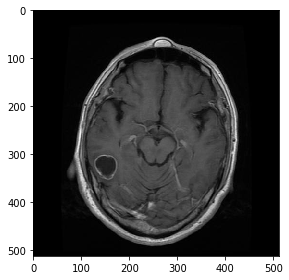

In [ ]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]

# The local path to our target image
# img_path = keras.utils.get_file(
#     "catdog.jpg", " https://arteagac.github.io/blog/lime_image/img/cat-and-dog.jpg"
# )
img_path = skimage.io.imread("/content/drive/MyDrive/mri_project/Training/glioma_tumor/gg (12).jpg")#https://arteagac.github.io/blog/lime_image/img/cat-and-dog.jpg #/content/drive/My Drive/Dataset/Train/COVID_19/1F6343EE-AFEC-4B7D-97F5-62797EE18767.jpeg
# Xi = skimage.transform.resize(Xi, (224,224)) 
# Xi = (Xi - 0.5)*2 #Inception pre-processing
# skimage.io.imshow(Xi/2+0.5) # Show image before inception preprocessing 1_1.jpeg

skimage.io.imshow(img_path)